# Assignment 3: Bootstrap, confidence intervals & standard errors

## Learning Outcomes:
In this homework we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Preliminaries
Set up the environment by importing pandas, numpy, scipy, and matplotlib. 

In [1]:
import pandas as pd
import numpy as np
import scipy as ss
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

df_sample = pd.read_csv('run10sample.csv')
df = pd.read_csv('run10.csv')

## Task 1: Analyzing a sample from the  population (12pt)
In this task you will use the sample of runners that you got. 
### Question 1.1 (4pt)
What was the mean finishing time in the random sample?

In [2]:
df_sample['time'].mean()

98.1504

### Question 1.2 (4pt)
What is the number of men and women in your sample (tip: use groupby and size or count)?

In [13]:
df_sample['gender'].value_counts()


F    14
M    11
Name: gender, dtype: int64

### Question 1.3 (4pt)
What was the mean finishing time when you split the sample up by gender (see Homework 2, task 4)? 

In [14]:
df_sample.groupby('gender')['time'].mean()

gender
F    103.496429
M     91.346364
Name: time, dtype: float64

## Task 2: Resampling from the population (42 Points)
In this task you will have access to the data from the whole population to determine how much confidence you should have in the numbers you obained in Task 1.The dataset run10.csv contain the total population of 16923 competitors in the 2012 Cherry blossom run (cherryblossom.org). Having the whole population gives us the opportunity to check how good our sample estimate is. 

### Question 2.1 (10pt)

What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1? Can this difference be explained by the fact that our sample differs from the population in terms of gender distribution? How about age? Knowing these differences, how could we have improved our estimate?

In [24]:
print('mean time:', df['time'].mean())

print(df.groupby('gender')['time'].mean())

print(df['gender'].value_counts())

# differes by ~4% overall, and similarly for per gender, so gender doesn't seem to be the cause of the difference, even if the random sample selects a higher ratio of F:M than the population.

# if we look at the distribution of ages in both:
print(df['age'].describe())
print(df_sample['age'].describe())
# we see the mean differs by 1.5 years, and the median by 1 year, so the sample is slightly younger than the population, but the 50th percentile differs by 4 years, so the sample might not be representative of the population in terms of age.
# having a better distribution of ages in the sample might help to improve the estimate.

mean time: 94.51597470897596
gender
F    99.015584
M    88.426391
Name: time, dtype: float64
F    9732
M    7191
Name: gender, dtype: int64
count    16923.000000
mean        35.521066
std         10.163366
min          9.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         89.000000
Name: age, dtype: float64
count    25.000000
mean     37.040000
std       9.387403
min      23.000000
25%      30.000000
50%      37.000000
75%      42.000000
max      55.000000
Name: age, dtype: float64


Written answer:

### Question 2.2 (10pt)
Write a function **bootstrap**, which takes a data series (data) as an input and then performs a bootstrap. The function should take numIter samples from the data (with replacement) of size N. It should then calculate the statistics defined in fcn for each iteration and record it in a numpy-array, which it should then return.

Input arguments 
- data: data series to resample
- N: Sample size for each iteration 
- fcn: function to apply to the sample to get the statistics
- numIter: Number of resamples (should default to 1000) 

Output argument: 
- Numpy array of size numIter that contains the estimates of the statistic (i.e. the bootstrap sample)

Hints: 
- You can use np.random.choice to draw a sample (with or without replacement) from a data series 

In [52]:
def bootstrap(data, N, fcn, numIter=1000):
    bootstrap_samples = np.empty(numIter)
    for i in range(numIter):
        sample = np.random.choice(data, size=N, replace=True)
        bootstrap_samples[i] = fcn(sample)
    return bootstrap_samples


### Question 2.3 (8pt)
Call the resample (bootstrap) function from Question 2 with time from the whole population as the data series, mean as the statistic, and a sample size of 25. Plot a histogram of the samples – make sure your x-axis and y-axis are labeled and a caption added. Report the mean and the standard deviation of the resampled estimates. 

Written answer: 
Is the mean close to the mean of the population? Why? 
Is the standard deviation close to the standard deviation? Why not?

std of the bootstrap sample: 3.140149463155638
std of the population: 15.921655434555316


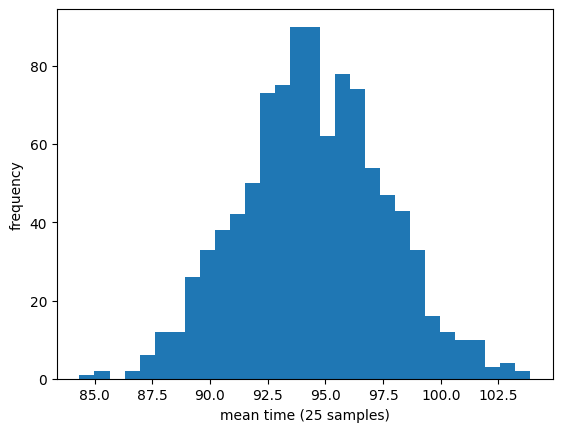

In [61]:
bs25 = bootstrap(df['time'], 25, np.mean)
plt.hist(bs25, bins=30)
plt.xlabel('mean time (25 samples)')
plt.ylabel('frequency')

# the mean of the population is ~94.5 and and a similar number is reflected in the histogram.
bs25_std = np.std(bs25)
print('std of the bootstrap sample:', bs25_std)

std = np.std(df['time'])
print('std of the population:', std)

# the standard devation differs quite greatly between the bootstrap sample and the population because the mean of 25 samples will be closer to the mean of the population than the mean of 1 sample

Written answer: 

### Question 2.4 (8pt)
Call your bootstrap function again as in question 3, this time increasing the sample size first to 50, and then to 100. Which of the values (mean, standard deviation) of the means distribution changes most and why? 

In [109]:
bs50 = bootstrap(df['time'], 50, np.mean)
print('50 mean:', np.mean(bs50))
print('50 std:', np.std(bs50))

bs100 = bootstrap(df['time'], 100, np.mean)
print('100 mean:', np.mean(bs100))
print('100 std:', np.std(bs100))

# the mean remains similar but the std deviation will decrease as the number of samples increases because it will get closer to the mean of the population. 
# if we take the sample size to be the entire population then the std deviation will be close to 0

50 mean: 94.570965
50 std: 2.2509856860351207
100 mean: 94.4385109
100 std: 1.5892916249547129


Written answer:

### Question 2.5 (6pt)
Calculate the predicted standard error of the mean from the population standard deviation and the same size for  N=25, N=50, and N=100. Write a line of code for each sample size that prints the answer in a full sentence. Written answer: Do these match up with the SEMs that you got from question 4? 

In [114]:
for N in [25, 50, 100]:
    SEM = std / np.sqrt(N)
    print(f"The predicted standard error of the mean for N = {N} is {SEM}.")


The predicted standard error of the mean for N = 25 is 3.184331086911063.
The predicted standard error of the mean for N = 50 is 2.251662105097942.
The predicted standard error of the mean for N = 100 is 1.5921655434555315.


Written answer: 

## Task 3: Calculating confidence intervals (24pt) 
### Question 3.1 (8pt)
Write a function (confidenceInt) that constructs a confidence interval from a bootstrap sample using the percentile bootstrap method (see lecture). 	

Input arguments 
- data: Sample of estimates – usually this is output from “bootstrap” (resample function from task 3 Q2)
- prec: What Confidence interval in percent? 95= 95% confidence interval <br/>
Output argument: 
- A list with 2 values: the lower and upper bound of the interval. 

Tip: Use np.percentile to get a specific percentile of the data. The lower bound of a 95% confidence interval is the (100-95)/2=2.5 percentile. 

In [115]:
def confidenceInt(data, prec=95) -> list:
    return(np.percentile(data, [(100-prec)/2, prec+(100-prec)/2]))


### Question 3.2 (8pt)
Determine the confidence 95% interval for the mean estimate of your sample of 25. Use your bootstrap function (resample from Task 3 Q2) above to generate 1000 artificial samples of 25. Then use your confidenceInt function to get the 95% confidence interval.  Report the interval. 


In [117]:
bs25 = bootstrap(df['time'], 25, np.mean)
confidenceInt(bs25)

array([ 87.99018, 100.7142 ])

### Question 3.3  (8pt)
Repeat the plotting of the histogram from task 2.3 – but this time plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline. Make sure that the graph has x- and y-labels and a caption.

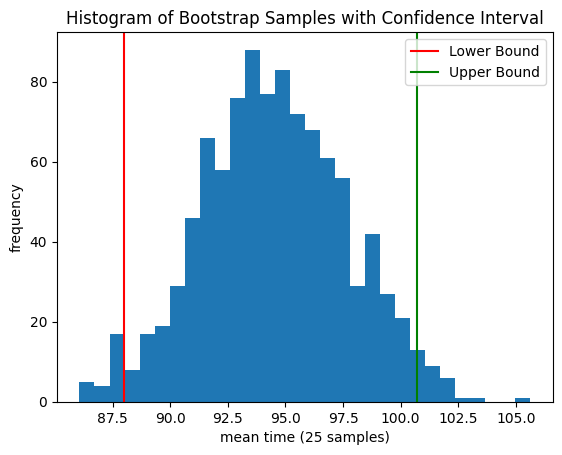

In [129]:
plt.hist(bs25, bins=30)
plt.xlabel('mean time (25 samples)')
plt.ylabel('frequency')
plt.axvline(confidenceInt(bs25)[0], color='red', label='Lower Bound')
plt.axvline(confidenceInt(bs25)[1], color='green', label='Upper Bound')
plt.legend()
plt.title('Histogram of Bootstrap Samples with Confidence Interval')
plt.show()


## Task 4: Bootstraping from the sample (22pt)
Now let's forget that you ever had the data from the whole population. Say, you only have your initial sample of 25 participants. How would you get an estimate of the confidence interval of the mean of the sample? 
### Question 4.1 (8pt)
Load the sample stored in run10sample.csv. Now call the resample function with that time data, in each loop resampling 25 data points from 25 data points (with replacement!). You have now taken 1000 bootstrap samples. Report the mean of the bootstrap samples, the standard deviation of the the samples, and the 95% confidence interval.

In [122]:
sample_bs = bootstrap(df_sample['time'], 25, np.mean)
print('sample mean:', np.mean(sample_bs))
print('sample std:', np.std(sample_bs))
print('sample confidence interval:', confidenceInt(sample_bs))

sample mean: 97.97536319999999
sample std: 2.8050813038494553
sample confidence interval: [ 92.70446 103.51245]


### Question 4.2 (8pt)
Plot of the histogram of your bootstrap samples –plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline (see homework 3). Plot the true population mean (Task 2.1) as a red vertical line. Make sure that the graph has x- and y-labels. 

confidence interval of sample: [ 92.70446 103.51245]
population mean: 94.51597470897596


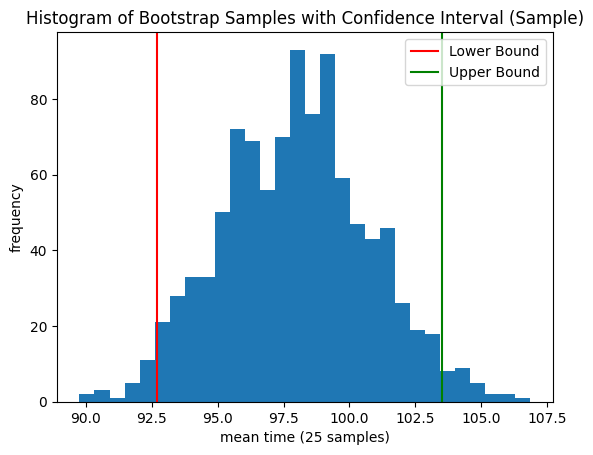

In [133]:
plt.hist(sample_bs, bins=30)
plt.xlabel('mean time (25 samples)')
plt.ylabel('frequency')
plt.axvline(confidenceInt(sample_bs)[0], color='red', label='Lower Bound')
plt.axvline(confidenceInt(sample_bs)[1], color='green', label='Upper Bound')
plt.legend()
plt.title('Histogram of Bootstrap Samples with Confidence Interval (Sample)')

print('confidence interval of sample:', confidenceInt(sample_bs))
print('population mean:', df['time'].mean())

### Question 4.3: (6pt)
Written answer: Does the 95% confidence interval include the true population mean? Does it include the mean value from last year’s cherry blossom run (101min)? Is there statistical evidence from your sample of N=25, that the race times have gotten faster from last year? 

Written answer:  Yes, the confidence interval is 92.7 to 103.5, so the population mean of 94.5 is included, as is the mean value of last year's cherry blossom run of 101. the race time doesn't have seem to have gotten significantly faster so it doesn't really suggest there is statistical evidence that it is the case.